### **Key Components to Implement**
1. **Recurrent Neural Networks (RNNs)**:
   - Two layers: Sensory layer and M1 layer.
   - Sensory layer processes proprioceptive feedback.
   - M1 layer generates descending commands to muscles.

2. **Spinal Reflex**:
   - Afferent feedback from muscle kinematics (length, velocity, acceleration, jerk).
   - Reflex gain applied to the afferent feedback.

3. **Muscle Activation Dynamics**:
   - Combines descending commands from M1 and spinal reflex.
   - Includes time delays for neural and spinal reflex pathways.

4. **Musculoskeletal Model**:
   - Two-segment arm with six muscles.
   - Muscle activations produce forces, which generate joint torques and motion.

5. **Feedback Loop**:
   - Joint angles, velocities, and muscle states are fed back to the RNNs and spinal reflex.

---

### **1. Sensory Layer (`y_s`)**
- **Description**: Represents the sensory cortex, which processes sensory feedback (`u_fb`).
- **Number of Units**: `n_s = 200` (as per the researchers' description).
- **Shape**: `[n_s]` or `[200]` (a 1D tensor with 200 elements).

---

### **2. Motor Layer (`y_m`)**
- **Description**: Represents the motor cortex, which generates descending commands to muscles.
- **Number of Units**: `n_m1 = 200` (as per the researchers' description).
- **Shape**: `[n_m1]` or `[200]` (a 1D tensor with 200 elements).

---

### **3. Muscle Activation Layer (`y_act`)**
- **Description**: Projects the motor cortex output to the muscles. The number of units matches the number of muscles.
- **Number of Units**: `n_muscles = 6` (6 muscles in the `myoElbow` model).
- **Shape**: `[n_muscles]` or `[6]` (a 1D tensor with 6 elements).

---

### **4. Feedback Input (`u_fb`)**
- **Description**: Proprioceptive feedback, including joint angles, velocities, and muscle forces.
- **Components**:
  - `θ_d(t)`: Delayed joint angles (e.g., shoulder and elbow).
  - `θ_g`: Goal joint angles.
  - `F_m`: Muscle forces (6 muscles).
- **Shape**: `[n_inputs]` or `[10]` (2 joint angles + 2 joint velocities + 6 muscle forces).

---

### **5. Afferent Feedback (`x_aff`)**
- **Description**: Encodes muscle kinematics (length, velocity, acceleration, jerk) for each muscle.
- **Components**:
  - `Δx_ml`: Muscle length changes.
  - `x_mv`: Muscle velocities.
  - `x_ma`: Muscle accelerations.
  - `x_mj`: Muscle jerks.
- **Shape**: `[n_muscles, 4]` or `[6, 4]` (6 muscles × 4 kinematic states).

---

### **6. Weight Matrices**
- **Sensory Layer Weights (`w_sr`, `w_si`)**:
  - `w_sr`: Recurrent weights for the sensory layer.
    - Shape: `[n_s, n_s]` or `[200, 200]`.
  - `w_si`: Weights connecting sensory feedback to the sensory layer.
    - Shape: `[n_s, n_inputs]` or `[200, 10]`.

- **Motor Layer Weights (`w_mr`, `w_mi`)**:
  - `w_mr`: Recurrent weights for the motor layer.
    - Shape: `[n_m1, n_m1]` or `[200, 200]`.
  - `w_mi`: Weights connecting the sensory layer to the motor layer.
    - Shape: `[n_m1, n_s]` or `[200, 200]`.

- **Muscle Activation Weights (`w_act`)**:
  - Weights connecting the motor layer to the muscle activation layer.
    - Shape: `[n_muscles, n_m1]` or `[6, 200]`.

---

### **7. Bias Terms**
- **Sensory Layer Bias (`b_s`)**:
  - Shape: `[n_s]` or `[200]`.
- **Motor Layer Bias (`b_m`)**:
  - Shape: `[n_m1]` or `[200]`.

---

### **8. Reflex Parameters**
- **Stretch Reflex Gain (`G_s`)**:
  - Scalar value (e.g., `0.8` or `1.9`).
- **Afferent Encoding Gains (`G_aff`)**:
  - Shape: `[4]` (for length, velocity, acceleration, jerk).

---

### **9. Neural Dynamics**
- **Sensory Layer Dynamics**:
  - `y_s(t+Δt) = (1-(Δt/τ_n))*y_s(t) + (Δt/τ_n) * tanh(u_s(t))`
  - Shape of `y_s`: `[n_s]` or `[200]`.
- **Motor Layer Dynamics**:
  - `y_m(t+Δt) = (1-(Δt/τ_n))*y_m(t) + (Δt/τ_n) * tanh(u_m(t))`
  - Shape of `y_m`: `[n_m1]` or `[200]`.
- **Muscle Activation Dynamics**:
  - `y_act(t+Δt) = (1-(Δt/τ_m))*y_act(t) + (Δt/τ_m) * ReLU(u_act(t))`
  - Shape of `y_act`: `[n_muscles]` or `[6]`.

---

### **10. Observation (`obs`)**
- **Description**: The observation returned by the environment.
- **Components**:
  - `qpos`: Joint positions (e.g., shoulder and elbow).
  - `qvel`: Joint velocities.
  - `act`: Muscle activations.
  - `pose_err`: Pose error.
- **Shape**: `[11]` (as per the `myoElbow` environment).

---

### **Summary of Shapes**

| Component                  | Shape         | Description                                      |
|----------------------------|---------------|--------------------------------------------------|
| `y_s` (Sensory Layer)      | `[200]`       | Sensory cortex output.                          |
| `y_m` (Motor Layer)        | `[200]`       | Motor cortex output.                            |
| `y_act` (Muscle Activation)| `[6]`         | Muscle activation output.                       |
| `u_fb` (Feedback Input)    | `[10]`         | Proprioceptive feedback.                        |
| `x_aff` (Afferent Feedback)| `[6, 4]`      | Muscle kinematics (length, velocity, etc.).     |
| `w_sr`                    | `[200, 200]`  | Sensory layer recurrent weights.               |
| `w_si`                    | `[200, 10]`    | Sensory feedback to sensory layer weights.      |
| `w_mr`                    | `[200, 200]`  | Motor layer recurrent weights.                 |
| `w_mi`                    | `[200, 200]`  | Sensory layer to motor layer weights.           |
| `w_act`                   | `[6, 200]`    | Motor layer to muscle activation weights.       |
| `b_s` (Sensory Bias)       | `[200]`       | Sensory layer bias.                             |
| `b_m` (Motor Bias)         | `[200]`       | Motor layer bias.                               |
| `G_s`                     | `scalar`      | Stretch reflex gain.                            |
| `G_aff`                   | `[4]`         | Afferent encoding gains.                        |
| `obs`                     | `[11]`         | Observation from the environment.               |

---

In [1]:
# Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import myosuite
import gymnasium as gym

MyoSuite:> Registering Myo Envs


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/opt/anaconda3/envs/opensim_scripting/lib/python3.11/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment myoArmReachFixed-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/opt/anaconda3/envs/opensim_scripting/lib/python3.11/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment myoSarcArmReachFixed-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec

In [2]:
# --- Simulation parameters ---
dt = 0.01       # Time step (10 ms)
tau_n = 0.02    # Neuron time constant (20 ms)
tau_m = 0.05    # Muscle time constant (50 ms)

# --- Neural network parameters ---
n_s = 200       # Number of sensory neurons
n_m1 = 200      # Number of motor neurons
n_muscles = 6   # Number of muscles
n_inputs = 10   # Size of proprioceptive feedback (from myoElbow observation)

# --- Feedback gains ---
G_p = 1.0       # Gain for position error
G_d = 1.0       # Gain for velocity
G_f = 1.0       # Gain for muscle forces

# --- Reflex parameters ---
G_aff = torch.tensor([1, 0.1, 0.01, 0.0001])  # Encoding gains for length, velocity, acceleration, jerk
G_s_low = 0.8                                 # Spinal reflex gain (low reflex gain)
G_s_high = 1.9                                # Spinal reflex gain (high reflex gain)
reflex_delay = int(0.02 / dt)                 # Spinal reflex delay (20 ms)

# --- Transcortical afferent delay ---
feedback_delay_steps = int(0.04 / dt)         # Transcortical afferent delay (40 ms)

# --- Movement arm matrix (Mm) ---
# TODO: Extract these values from myoElbow model directly
M_m = torch.tensor([
    [0.05, 0.0],  # Muscle 1 (shoulder flexor)
    [0.05, 0.0],  # Muscle 2 (shoulder extensor)
    [0.0, 0.04],  # Muscle 3 (elbow flexor)
    [0.0, 0.04],  # Muscle 4 (elbow extensor)
    [0.03, 0.03], # Muscle 5 (biarticular biceps)
    [0.03, 0.03]  # Muscle 6 (biarticular triceps)
], dtype=torch.float32)

# --- Target joint positions ---
target_qpos = torch.tensor([1.5, 1.0], dtype=torch.float32)  # Desired joint positions (shoulder, elbow)
target_qpos = target_qpos.clone().detach().requires_grad_(True)

# --- Penalty coefficients for cost function ---
alpha = 0.0001  # Penalizes neural activity
beta = 0.01     # Penalizes force output
gamma = 0.5     # Penalizes kinematic error

# --- Time parameters for background and perturbation loads ---
Tb = 200 / 1000    # Background load onset (200 ms)
Tp = 1500 / 1000   # Perturbation load onset (1500 ms)
T = 3000 / 1000    # Total motion time (3000 ms)
Tsb = 1000 / 1000  # Steady-state realization of background load (1000 ms)
Tsp = 2500 / 1000  # Steady-state realization of perturbation load (2500 ms)

# --- External loads ---
background_load_low = 0.1    # Low background load (Nm)
background_load_high = 0.55  # High background load (Nm)
perturbation_load = 0.25     # Perturbation load (Nm)

In [3]:
# Register the custom environment
from custom_env_2D6M import MyoElbowPose2D6MFixed
from gymnasium.envs.registration import register

if "MyoElbowPose2D6MFixed-v0" not in gym.envs.registry:
    register(
        id="MyoElbowPose2D6MFixed-v0",
        entry_point="custom_env_2D6M:MyoElbowPose2D6MFixed",
    )

# Create the custom environment
env = gym.make("MyoElbowPose2D6MFixed-v0")

# Initialize muscle lengths
L_m = torch.ones(n_muscles)

# Initialize delayed feedback buffers
joint_angle_buffer = [torch.zeros(2) for _ in range(feedback_delay_steps)]
joint_velocity_buffer = [torch.zeros(2) for _ in range(feedback_delay_steps)]

In [4]:
# Define the NeuralLimbController
class NeuralLimbController(nn.Module):
    """Neural controller for a two-segment limb model."""

    def __init__(self, n_inputs, n_outputs=n_muscles):
        """Initialize the neural controller."""
        super(NeuralLimbController, self).__init__()
        
        # Sensory layer (input layer)
        self.w_sr = nn.Parameter(torch.empty(n_s, n_s).uniform_(-1/np.sqrt(n_inputs), 1/np.sqrt(n_inputs)))
        self.w_si = nn.Parameter(torch.empty(n_s, n_inputs).uniform_(-1/np.sqrt(n_inputs), 1/np.sqrt(n_inputs)))
        self.b_s = nn.Parameter(torch.zeros(n_s))

        # M1 layer (output layer)
        self.w_mr = nn.Parameter(torch.empty(n_m1, n_m1).uniform_(-1/np.sqrt(n_s), 1/np.sqrt(n_s)))
        self.w_mi = nn.Parameter(torch.empty(n_m1, n_s).uniform_(-1/np.sqrt(n_s), 1/np.sqrt(n_s)))
        self.b_m = nn.Parameter(torch.zeros(n_m1))
        
        # Muscle activation layer weights (from M1 to muscle)
        self.w_act = nn.Parameter(torch.empty(n_muscles, n_m1).uniform_(-1/np.sqrt(n_m1), 1/np.sqrt(n_m1)))
        
        # Internal state variables
        self.y_s = torch.zeros(n_s)          # Sensory Layer output (y_s(t))
        self.y_m = torch.zeros(n_m1)         # M1 Layer output (y_m(t))
        self.y_act = torch.zeros(n_muscles)  # Muscle Activation output (y_act(t))
    
    def neural_activation_step(self, y_t, u_t):
        """Discretized neural activation dynamics."""
        return (1 - (dt / tau_n)) * y_t + (dt / tau_n) * torch.tanh(u_t)
    
    def muscle_activation_step(self, y_act_t, u_act_t):
        """Discretized muscle activation dynamics."""
        return (1 - (dt / tau_m)) * y_act_t + (dt / tau_m) * torch.relu(u_act_t)

    def forward_step(self, u_fb_t, x_aff_t, y_s_delayed_t):
        """Perform a single forward step of the neural controller."""
        # Sensory layer input (u_s) and output (y_s)
        u_s = self.w_sr @ y_s_delayed_t + self.w_si @ u_fb_t + self.b_s
        self.y_s = self.neural_activation_step(self.y_s, u_s)
        
        # M1 layer input (u_m) and output (y_m)
        u_m = self.w_mr @ self.y_m + self.w_mi @ self.y_s + self.b_m
        self.y_m = self.neural_activation_step(self.y_m, u_m)
        
        # Muscle activation layer input (u_act) and output (y_act)
        u_act = self.w_act @ self.y_m + G_s_low * x_aff_t
        self.y_act = self.muscle_activation_step(self.y_act, u_act)
        
        return self.y_act

In [5]:
# Instantiate the neural controller
controller = NeuralLimbController(n_inputs=n_inputs, n_outputs=n_muscles)

# Set up optimizer
optimizer = torch.optim.Adam(controller.parameters(), lr=0.0001)

/opt/anaconda3/envs/opensim_scripting/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pose_error to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pose_error` for environment variables or `env.get_wrapper_attr('pose_error')` that will search the reminding wrappers.
  logger.warn(


Epoch 100/400 | Cumulative Cost: 2811.9894
Epoch 200/400 | Cumulative Cost: 741.4927
Epoch 300/400 | Cumulative Cost: 1878.9948
Epoch 400/400 | Cumulative Cost: 994.4125


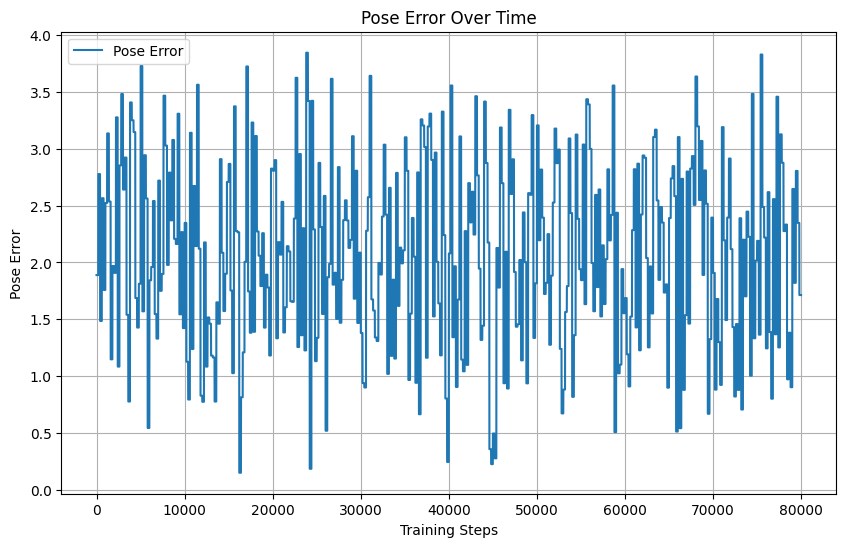

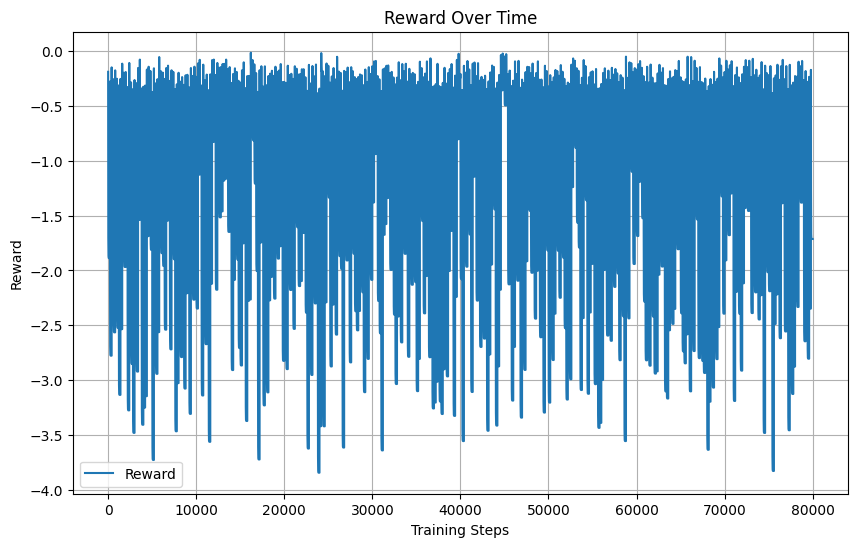

Training complete!


In [6]:
import matplotlib.pyplot as plt

pose_errors = []
rewards = []

# Training loop
num_epochs = 400
for epoch in range(num_epochs):
    # Reset environment and variables and initialize the loop
    obs, info = env.reset()
    terminated, truncated = False, False
    cumulative_cost = 0
    step_count = 0

    while not (terminated or truncated):
        # Reinitialize the controller's internal state
        controller.y_s = torch.zeros_like(controller.y_s, requires_grad=True)
        controller.y_m = torch.zeros_like(controller.y_m, requires_grad=True)
        controller.y_act = torch.zeros_like(controller.y_act, requires_grad=True)

        # Extract observation components
        qpos = torch.tensor(obs[:2], dtype=torch.float32)  # Joint positions (shoulder, elbow)
        qvel = torch.tensor(obs[2:4], dtype=torch.float32)  # Joint velocities (shoulder, elbow)
        act = torch.tensor(obs[4:10], dtype=torch.float32, requires_grad=True)  # Muscle activations (6 muscles)
        pose_err = torch.tensor(obs[10], dtype=torch.float32)  # Pose error (scalar)

        # Compute muscle length changes
        dLm_dt = (-M_m @ qvel.unsqueeze(1)).squeeze()
        L_m = L_m + dLm_dt.squeeze() * dt

        # Ensure L_m and dLm_dt require gradients
        L_m = L_m.clone().detach().requires_grad_(True)
        dLm_dt = dLm_dt.clone().detach().requires_grad_(True)

        # Update delayed feedback buffers
        joint_angle_buffer.append(qpos)
        joint_velocity_buffer.append(qvel)
        delayed_qpos = joint_angle_buffer.pop(0)
        delayed_qvel = joint_velocity_buffer.pop(0)

        # Compute muscle forces (F_m) using FL and FV properties
        # TODO: Adjust FL and FV to match MyoSuite's muscle model
        FL = torch.clamp(1.0 - (L_m - 1.0).pow(2), min=0.0)
        FV = torch.clamp(1.0 - dLm_dt.abs(), min=0.0)
        F_m = act * FL * FV

        # Compute feedback input (u_fb)
        position_error = G_p * (delayed_qpos - target_qpos)
        velocity_feedback = G_d * delayed_qvel
        force_feedback = G_f * F_m
        u_fb = torch.cat([position_error, velocity_feedback, force_feedback.view(-1)])

        # Compute neural activity cost
        neural_cost = controller.y_s.pow(2).mean() + controller.y_m.pow(2).mean()

        # Compute force output cost
        force_cost = F_m.pow(2).mean()

        # Background load kinematic cost
        J_b_1 = (qpos - target_qpos).pow(2).mean() + 0.5 * qvel.pow(2).mean()  # [0, T_b]
        J_b_2 = (qpos - target_qpos).pow(2).mean() + 0.5 * qvel.pow(2).mean()  # [T_sb, T_p]
        J_b = (J_b_1 / Tb) + (J_b_2 / (Tp - Tsb))

        # Perturbation load kinematic cost
        J_p = (qpos - target_qpos).pow(2).mean() + 0.5 * qvel.pow(2).mean()    # [T_sp, T]
        J_p /= (T - Tsp)

        # Compute kinematic cost
        kinematic_cost = J_b + J_p

        # Composite cost function
        cost = alpha * neural_cost + beta * force_cost + gamma * kinematic_cost
        cumulative_cost += cost.detach().item()

        # Backpropagation
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        # Generate muscle activations using the neural controller
        x_aff_t = torch.zeros(n_muscles)  # Placeholder for afferent feedback
        muscle_activations = controller.forward_step(
            u_fb_t=u_fb,                  # Feedback input
            x_aff_t=x_aff_t,              # Afferent feedback
            y_s_delayed_t=controller.y_s  # Delayed sensory layer output
        )

        # Step the environment
        obs, reward, terminated, truncated, info = env.step(muscle_activations.detach().numpy())

        pose_errors.append(env.pose_error)
        rewards.append(reward)
        
        step_count += 1

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{num_epochs} | Cumulative Cost: {cumulative_cost:.4f}")

# Plot the pose error
plt.figure(figsize=(10, 6))
plt.plot(pose_errors, label="Pose Error")
plt.xlabel("Training Steps")
plt.ylabel("Pose Error")
plt.title("Pose Error Over Time")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(rewards, label="Reward")
plt.xlabel("Training Steps")
plt.ylabel("Reward")
plt.title("Reward Over Time")
plt.legend()
plt.grid()
plt.show()

print("Training complete!")

---
---

In [7]:
# import gymnasium as gym
# from stable_baselines3 import PPO
# from stable_baselines3.common.env_util import make_vec_env

# # Wrap the MyoElbow environment
# env = gym.make("myoElbowPose1D6MFixed-v0")

# # Wrap the environment for vectorized training
# vec_env = make_vec_env(lambda: env, n_envs=1)

# # Define the PPO model
# model = PPO("MlpPolicy", vec_env, verbose=1, learning_rate=0.001, n_steps=2048)

# # Train the model
# model.learn(total_timesteps=100000)

# # Save the trained model
# model.save("ppo_myo_elbow")

# # Evaluate the trained model
# obs, info = env.reset()
# done = False
# while not done:
#     action, _ = model.predict(obs)
#     obs, reward, done, truncated, info = env.step(action)
#     print(f"Reward: {reward}")

# env.close()

In [8]:
# class CustomPolicy(ActorCriticPolicy):
#     def __init__(self, observation_space, action_space, lr_schedule, **kwargs):
#         super(CustomPolicy, self).__init__(observation_space, action_space, lr_schedule, **kwargs)

#         # Use your NeuralLimbController as the policy network
#         self.controller = NeuralLimbController(n_inputs=n_inputs, n_outputs=n_muscles)

#         # Define the value network (critic)
#         self.value_net = nn.Sequential(
#             nn.Linear(n_inputs, 64),
#             nn.ReLU(),
#             nn.Linear(64, 1)
#         )

#     def forward(self, obs: torch.Tensor):
#         # Process the observation and generate muscle activations
#         u_fb_t = obs[:, :n_inputs]  # Extract proprioceptive feedback
#         x_aff_t = obs[:, n_inputs:]  # Extract afferent feedback
#         y_s_delayed_t = torch.zeros(n_s)  # Placeholder for delayed sensory layer output

#         # Generate muscle activations (actions)
#         actions = self.controller.forward_step(u_fb_t, x_aff_t, y_s_delayed_t)

#         # Compute value estimate
#         values = self.value_net(obs)

#         return actions, values

#     def _predict(self, observation: torch.Tensor, deterministic: bool = False):
#         # Predict actions (muscle activations)
#         actions, _ = self.forward(observation)
#         return actions

In [9]:
# from stable_baselines3 import PPO

# # Wrap the environment
# env = gym.make("myoElbowPose1D6MFixed-v0")

# # Define the PPO model with the custom policy
# model = PPO(CustomPolicy, env, verbose=1, learning_rate=0.001, n_steps=2048)

# # Train the model
# model.learn(total_timesteps=100000)

# # Save the trained model
# model.save("ppo_myo_elbow_custom_policy")
# print("Model saved as 'ppo_myo_elbow_custom_policy'")